Analisis de Brecha Salaria por Género en la Industria de Software Argentina 2018
================================================================================

En este notebook vamos a analizar los resultados de las encuestas de sueldos de SysArmy para observar las diferencias, particularmente en materia de sueldos, entre hombres y muers

In [232]:
import pandas
from scipy import stats
import matplotlib.pyplot as plt
import seaborn
seaborn.set(color_codes=True)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [233]:
datafile = open('clean.csv')
data = pandas.read_csv(datafile)

Podemos ver que los datos han sido limpiados y reflejan datos en relacion a la experiencia, edad, sexo, y sueldo de los participantes de las encuestas. Gracias a @seppo por proveer un script de cleanup de datos que facilitó este analisis. Sepan que la limpieza de datos es muchas veces el trabajo más tedioso del proceso.

In [166]:
data.head()

,sex,age,experience,managing,degree,web,back,web_mobile,ios,android,human,salary
0,0.0,35.5,3.0,0.0,3.5,0.0,1.0,0.0,0.0,0.0,1,20770.0
1,0.0,32.0,6.0,0.0,2.5,0.0,1.0,0.0,0.0,0.0,1,17220.0
2,0.0,28.5,3.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1,18000.0
3,0.0,19.0,0.0,0.0,3.5,0.0,1.0,0.0,0.0,0.0,1,15000.0
4,0.0,25.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,1,24000.0


In [5]:
women = data[data.sex==1]

In [24]:
women[['age', 'salary']].describe()

,age,salary
count,85.000000,85.000000
mean,29.670588,34905.505882
std,5.211910,17158.235245
min,22.000000,8000.000000
25%,25.000000,22400.000000
50%,28.500000,30800.000000
75%,32.000000,44000.000000
max,47.500000,109000.000000


In [26]:
men = data[data.sex == 0]
men[['age', 'salary']].describe()

,age,salary
count,616.000000,616.000000
mean,31.271916,46922.820455
std,6.757796,26718.924821
min,19.000000,7500.000000
25%,25.000000,30000.000000
50%,32.000000,42000.000000
75%,35.500000,56000.000000
max,65.000000,193000.000000


Podemos ver que la edad media del programador hombre es de 2 años más, con un rango de edad más amplio.

También podemos ver que la media de sueldo de las mujeres es \$34905, mientras que la de los hombres es de \$46922. Una diferencia muy sustancial.

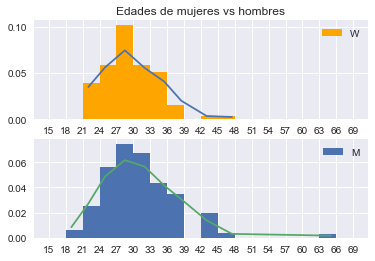

In [172]:
# Let's plot the age distribution of men and women and approximate the distribution assuming a gaussian kernel

bins = range(15,70, 3)

sorted_women = sorted(women['age'])

w_kernel = stats.gaussian_kde(sorted_women)

plt.subplot(2, 1, 1)
plt.title("Edades de mujeres vs hombres")
plt.hist(women['age'], bins=bins, color='orange', density=True)
plt.xticks(bins)
plt.legend("Women")
plt.plot(sorted_women, w_kernel(sorted_women))

sorted_men = sorted(men['age'])

m_kernel = stats.gaussian_kde(sorted_men)
plt.subplot(2, 1, 2)
plt.hist(men['age'], bins=bins, density=True)
plt.xticks(bins)
plt.legend("Men")
plt.plot(sorted_men, m_kernel(sorted_men))
plt.show()

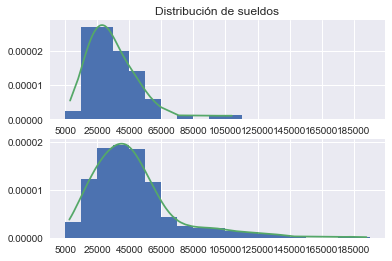

In [173]:
bins = range(5000, 200000, 10000)

m_salaries = men['salary']
w_salaries = women['salary']

sorted_women = sorted(w_salaries)
sorted_men = sorted(m_salaries)

m_kernel = stats.gaussian_kde(m_salaries)
w_kernel = stats.gaussian_kde(w_salaries)

plt.subplot(2, 1, 1)
plt.title("Distribución de sueldos")
plt.xticks(range(5000, 200000, 20000))
plt.hist(w_salaries, bins=bins, density=True)
plt.plot(sorted_women, w_kernel(sorted_women))

plt.subplot(2, 1, 2)
plt.xticks(range(5000, 200000, 20000))
plt.hist(m_salaries, bins=bins, density=True)
plt.plot(sorted_men, m_kernel(sorted_men))

plt.show()


El ultimo analisis es interesante. No solo el sueldo promedio de los hombres es considerablemente más alto, sino que el sueldo máximo es muchisimo más alto.

Ahora, si miramos cómo está realizada la encuesta, pueden ver que la misma generaliza la experiencia de quienes tienen más de 10 años de experiencia a un solo número, lo que también genera el bache extraño en la distribución de edades del histograma más arriba.

Qué pasa si trabajamos solo con personas con 9 años de experiencia o menos, donde la encuesta hila más finamente?

Vemos también que hay una minoria no trivial de hombres que reportan tener un sueldo por encima de los $70K. Hipótesis: esas personas trabajan para el mercado en el exterior. Qué pasa si los quitamos como outliers?

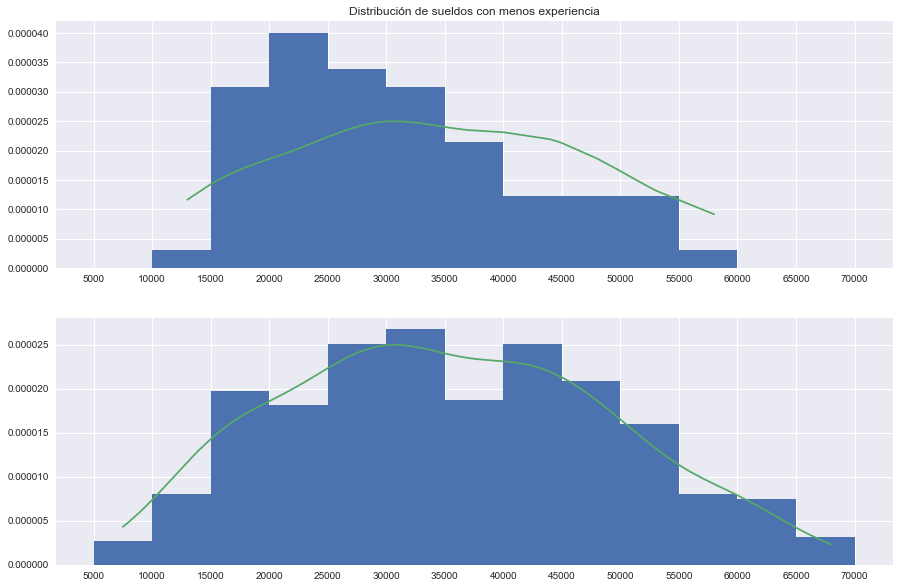

In [240]:
w_unexp = women[(women.experience < 10) & (women.salary<70000)]['salary']
m_unexp = men[(men.experience < 10) & (men.salary<70000)]['salary']

sorted_women = sorted(w_unexp)
sorted_men = sorted(m_unexp)

m_kernel = stats.gaussian_kde(sorted_women)
w_kernel = stats.gaussian_kde(sorted_men)

plt.subplot(2, 1, 1)
plt.title("Distribución de sueldos con menos experiencia")
plt.xticks(range(5000, 75000, 5000))
plt.hist(w_unexp, bins=range(5000, 75000, 5000), density=True)
plt.plot(sorted_women, w_kernel(sorted_women))

plt.subplot(2, 1, 2)
plt.xticks(range(5000, 75000, 5000))
plt.hist(m_unexp, bins=range(5000, 75000, 5000), density=True)
plt.plot(sorted_men, w_kernel(sorted_men))

plt.show()


In [243]:
print("Resumen de mujeres con menos de 10 años exp")
w_unexp.describe()

Resumen de mujeres con menos de 10 años exp


count       65.000000
mean     30077.969231
std      10816.897165
min      13000.000000
25%      21350.000000
50%      29000.000000
75%      35000.000000
max      58000.000000
Name: salary, dtype: float64

In [244]:
print("Resumen de hombres con menos de 10 años exp")
m_unexp.describe()

Resumen de hombres con menos de 10 años exp


count      374.000000
mean     35062.027807
std      13777.766737
min       7500.000000
25%      25000.000000
50%      34300.000000
75%      45000.000000
max      68000.000000
Name: salary, dtype: float64

Quitando los outliers de gente con mucho seniority y sueldo, la brecha que tenemos es de \$5000. También vemos que hay una proporción mayor de hombres que trabajan por sueldos muy bajos que mujeres, pero no es compensada por una enorme masa de hombres que ganan más de $40K.

Qué pasa si quitamos la gente que tiene experiencia gerencial? En general al ser gerente eso implica un salto de sueldo y experiencia

In [245]:
m_nonmanagers= men[(men.experience < 10) & (men.salary<70000) & (men.managing==0)]
m_nonmanagers_salary = m_nonmanagers['salary']

print("Resumen de hombres, no gerentes, con menos de 10 años exp")
m_nonmanagers_salary.describe()

Resumen de hombres, no gerentes, con menos de 10 años exp


count      335.000000
mean     34260.753433
std      13512.651811
min       7500.000000
25%      24000.000000
50%      33600.000000
75%      45000.000000
max      66000.000000
Name: salary, dtype: float64

In [246]:
w_nonmanagers = women[(women.experience < 10) & (women.salary<70000) & (women.managing==0)]
w_nonmanagers_salary = w_nonmanagers['salary']

print("Resumen de mujeres, no gerentes, con menos de 10 años exp")
w_nonmanagers_salary.describe()

Resumen de mujeres, no gerentes, con menos de 10 años exp


count       57.000000
mean     28552.070175
std       9603.823195
min      15000.000000
25%      21000.000000
50%      28000.000000
75%      33000.000000
max      58000.000000
Name: salary, dtype: float64

Podemos ver que el sueldo promedio de hombres que incluye managers es de \$34K vs \$35K para el promedio que incluye managers.

Para las mujeres, la diferencia es de: \$30K vs \$28K.

Cómo está distribuida la experiencia laboral entre este grupo de asalariados?

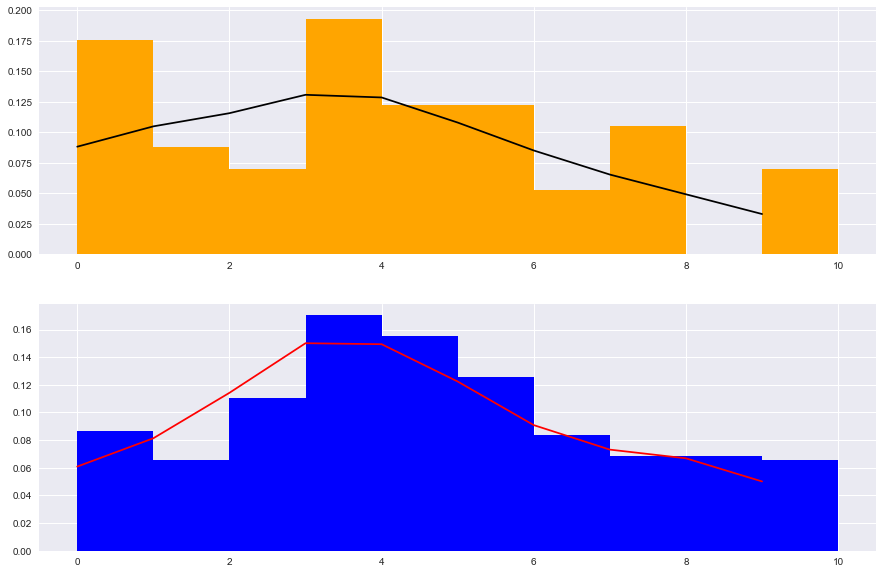

In [249]:
w_nonmanagers_exp = w_nonmanagers['experience']
m_nonmanagers_exp = m_nonmanagers['experience']

plt.title("Experiencia de programadores")

sorted_women = sorted(w_nonmanagers_exp)
sorted_men = sorted(m_nonmanagers_exp)

m_kernel = stats.gaussian_kde(m_nonmanagers_exp)
w_kernel = stats.gaussian_kde(w_nonmanagers_exp)

plt.subplot(211)
plt.hist(w_nonmanagers_exp, bins=range(0, 11),  density=True, color='orange')
plt.plot(sorted_women, w_kernel(sorted_women), color='black')

plt.subplot(212)

plt.hist(m_nonmanagers_exp, bins=range(0, 11), density=True, color='blue')
plt.plot(sorted_men, m_kernel(sorted_men), color='red')


plt.show()

In [250]:
print("Experiencia mujeres en años:\n")
print(w_nonmanagers_exp.describe())
print('\n------------------------\n')
print("Experiencia hombres en años:\n")
print(m_nonmanagers_exp.describe())

Experiencia mujeres en años:

count    57.000000
mean      3.596491
std       2.658273
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       9.000000
Name: experience, dtype: float64

------------------------

Experiencia hombres en años:

count    335.000000
mean       4.167164
std        2.529253
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: experience, dtype: float64


Podemos ver que la media de experiencia de los hombres es de unos meses más.

In [117]:
wnn_by_age = w_nonmanagers.groupby('age')
mnn_by_age = m_nonmanagers.groupby('age')

In [122]:
print("Experiencia promedio por edad mujeres:\n")
print(wnn_by_age['experience'].mean())
print("\n---------------\n")
print("Experiencia promedio por edad hombres:\n")
print(mnn_by_age['experience'].mean())

Experiencia promedio por edad mujeres:

age
22.0    1.000000
25.0    2.923077
28.5    4.000000
32.0    3.333333
35.5    6.750000
38.5    7.666667
Name: experience, dtype: float64

---------------

Experiencia promedio por edad hombres:

age
19.0    0.818182
22.0    1.975610
25.0    3.380435
28.5    4.637255
32.0    5.679245
35.5    6.086957
38.5    6.100000
43.0    3.000000
47.5    9.000000
65.0    8.000000
Name: experience, dtype: float64


Aqui notamos algo muy interesante: no hay mujeres mayores con menos experiencia siendo representadas en este grupo, y hasta los 32 años, todos los cohortes de dedad másculinos tienen más experiencia dada la misma edad.


Si queremos realmente entender la brecha salarial, tenemos que comparar los sueldos de hombre y mujeres bajo condición de
igual trabajo. Sino, los resultados de la diferencia salarial podrian ser explicados por un mayor nivel de experiencia,
mayor edad, una combinación de ambos, o algún otro factor externo. 

Vamos a plotear la relación de edad, experiencia, y sueldo.

In [157]:
wnn_by_age_exp = w_nonmanagers.groupby(['age', 'experience'])
wnn_datapoints = wnn_by_age_exp['salary'].agg(['count', 'mean']).reset_index()

In [158]:
mnn_by_age_exp = m_nonmanagers.groupby(['age', 'experience'])
mnn_datapoints = mnn_by_age_exp['salary'].agg(['count', 'mean']).reset_index()

In [193]:
wnn_datapoints.head()

,age,experience,count,mean
0,22.0,0.0,5,20280.0
1,22.0,1.0,1,18000.0
2,22.0,2.0,2,29500.0
3,22.0,4.0,1,27000.0
4,25.0,1.0,3,22250.0


In [194]:
mnn_datapoints[(mnn_datapoints.age>= 22) & (mnn_datapoints.age<=38.5)].head()

,age,experience,count,mean
3,22.0,0.0,10,15376.000000
4,22.0,1.0,8,18247.500000
5,22.0,2.0,6,25008.333333
6,22.0,3.0,10,30150.000000
7,22.0,4.0,4,40750.000000


In [217]:
def plot_by_exp(low, high):
    assert low >= 0 and high <= 10
    from collections import defaultdict
    exp_data = defaultdict(dict)

    colors = ['white', 'light lime', 'bright aqua', 'golden', 'grassy green', 'turquoise blue',
              'mustard brown', 'metallic blue', 'maroon', 'black']

    for i in range(low, high):
        exp_data[i]['men'] = wnn_datapoints[wnn_datapoints.experience == i]
        exp_data[i]['women'] = wnn_datapoints[mnn_datapoints.experience == i]

        plt.plot(exp_data[i]['men']['age'], exp_data[i]['men']['mean'], 
                 color='xkcd:' + colors[i], linestyle=':', label="Exp {}Y Men".format(i))
        plt.plot(exp_data[i]['women']['age'], exp_data[i]['women']['mean'], 
                 color='xkcd:' + colors[i], label="Exp {}Y Women".format(i))

    plt.legend()
    plt.ylim(5000, 70000)
    plt.show()
    
def get_table_for_exp(table, low, high):
    return table[(table.experience >= low) & (table.experience < high)]



In [252]:
print("Datos Juniors mujeres")
get_table_for_exp(wnn_datapoints, 0, 3)

Datos Juniors mujeres


,age,experience,count,mean
0,22.0,0.0,5,20280.00
1,22.0,1.0,1,18000.00
2,22.0,2.0,2,29500.00
4,25.0,1.0,3,22250.00
5,25.0,2.0,2,24700.00
10,28.5,0.0,4,22232.25
17,32.0,0.0,1,17000.00
18,32.0,1.0,1,15000.00


In [253]:
print("Datos Juniors Hombre")
get_table_for_exp(mnn_datapoints, 0, 3)

Datos Juniors Hombre


,age,experience,count,mean
0,19.0,0.0,7,15889.571429
1,19.0,2.0,3,16322.000000
3,22.0,0.0,10,15376.000000
4,22.0,1.0,8,18247.500000
5,22.0,2.0,6,25008.333333
9,25.0,0.0,6,20833.333333
10,25.0,1.0,7,22142.857143
11,25.0,2.0,14,26948.385714
18,28.5,0.0,4,19564.500000
19,28.5,1.0,5,21300.000000


/home/osinski/Projects/sueldos-argentina-2018.1/env/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


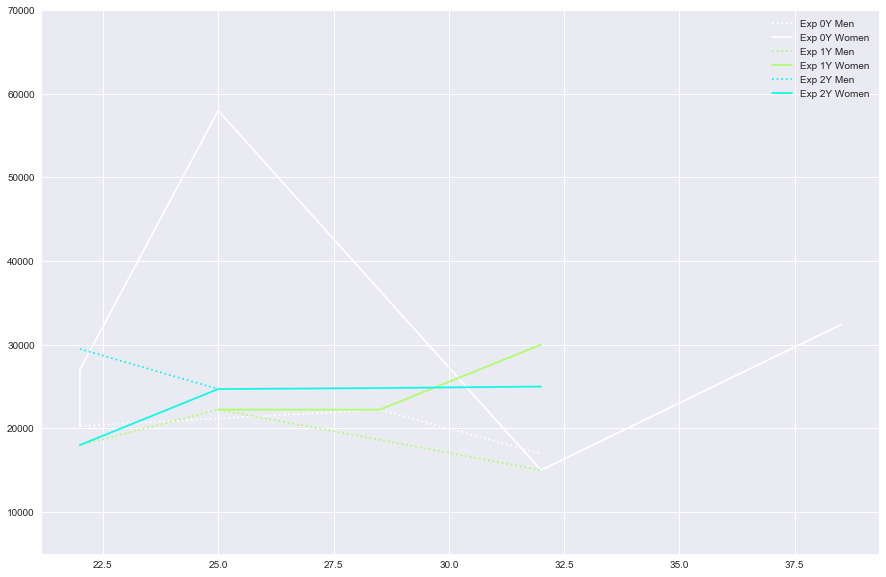

In [208]:
plot_by_exp(0,3)

Si bien estos gráficos pecan de que la cantidad de mujeres en estos subgrupos es baja, podemos ver que las mujeres sin experiencia ganaron más que los hombres. Lo mismo con un año de experiencia. A los dos años de experiencia pareceria haber outliers en la edad más jóven pero luego la misma es igual.

Es también intersante notar que no hay hombres con más de 32 años de edad que sean contratados sin experiencia.

In [226]:
print("Semi-seniors hombre")
get_table_for_exp(mnn_datapoints, 3, 6)

Semi-seniors hombre


,age,experience,count,mean
2,19.0,3.0,1,25000.000000
6,22.0,3.0,10,30150.000000
7,22.0,4.0,4,40750.000000
8,22.0,5.0,3,38393.333333
12,25.0,3.0,20,34960.000000
13,25.0,4.0,22,40445.454545
14,25.0,5.0,15,40600.000000
21,28.5,3.0,18,31398.944444
22,28.5,4.0,16,37946.875000
23,28.5,5.0,10,42460.000000


In [227]:
print("Semi-seniors mujer")
get_table_for_exp(wnn_datapoints, 3, 6)

Semi-seniors mujer


,age,experience,count,mean
3,22.0,4.0,1,27000.000000
6,25.0,3.0,4,26000.000000
7,25.0,4.0,2,30800.000000
8,25.0,5.0,1,51000.000000
11,28.5,3.0,6,24816.666667
12,28.5,4.0,3,27000.000000
13,28.5,5.0,3,32333.333333
19,32.0,3.0,1,30000.000000
20,32.0,4.0,1,25000.000000
21,32.0,5.0,1,28000.000000


/home/osinski/Projects/sueldos-argentina-2018.1/env/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


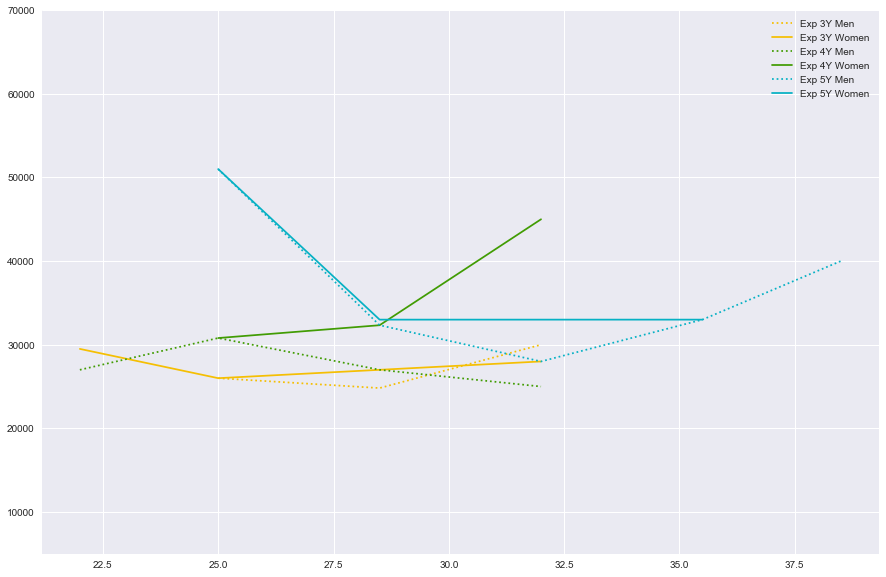

In [209]:
plot_by_exp(3,6)

Cuando empezamos a ver gente más semi-senior y senior, el patron sigue siendo similar: igual paga a los 3 años, levemente menos para los 4 años donde se puede comparar directamente entre hombre y mujer, idem 5 años. Recordemos que la cantidad de mujeres involucradas para cada datos es muy baja, por lo que el valor específico para cada una dificilmente establece un patrón claro.

In [230]:
print("Seniors hombre")
get_table_for_exp(mnn_datapoints, 6, 10)


Seniors hombre


,age,experience,count,mean
15,25.0,6.0,5,42200.000000
16,25.0,7.0,1,40000.000000
17,25.0,8.0,2,57500.000000
24,28.5,6.0,13,37512.923077
25,28.5,7.0,12,41398.333333
26,28.5,8.0,8,41187.500000
27,28.5,9.0,6,49666.666667
34,32.0,6.0,6,40870.000000
35,32.0,7.0,7,42478.571429
36,32.0,8.0,11,41018.181818


In [231]:
print("Seniors mujer")
get_table_for_exp(wnn_datapoints, 6, 10)

Seniors mujer


,age,experience,count,mean
9,25.0,6.0,1,58000.0
14,28.5,6.0,1,33000.0
15,28.5,7.0,4,34500.0
16,28.5,9.0,1,30000.0
22,32.0,7.0,1,45000.0
24,35.5,6.0,1,36000.0
25,35.5,7.0,1,44700.0
26,35.5,9.0,1,36000.0
28,38.5,9.0,2,32394.5


/home/osinski/Projects/sueldos-argentina-2018.1/env/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


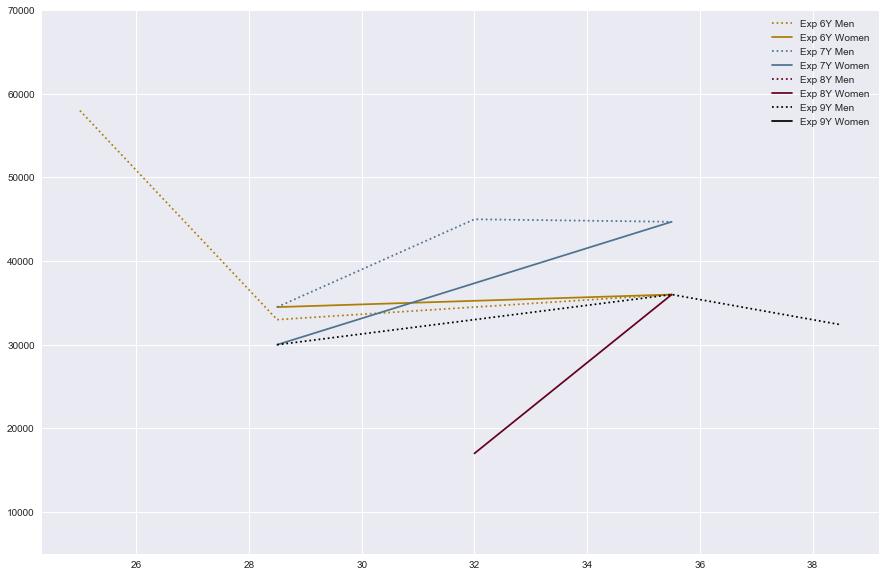

In [210]:
plot_by_exp(6,10)

Vemos, por último, a los desarrolladores con más experiencia.

Pareceria haber outliers sustanciales en el rango de edad más joven a los 6 años de exp, aunque donde la misma es comparable con mujeres vemos que las mujeres están en condiciones similares. No obstante, en los 7 años de experiencia los datos tiran una brecha sustancial de $5K entre los 28 y 36 años de edad.

El problema que tenemos con esta franja de seniority es que hay muy pocas mujeres, por lo tanta para muchos valores de edad y experiencia tal vez puede haber solo una, o ninguna, mujer. Dada la varianza de los datos, que a la unica mujer de un punto le paguen más o menos altera los resultados sustancialmente pero no provee certeza estadística. Por ejemplo, la única mujer en el rango de 32 años con 7 años de experiencia gana \$45K, \$3K más que la media equivalente masculina. Pero también, de los 28,5 años de edad y 7 de experiencia, hay unos \$7K de diferencia.

Conclusiones
--------------

Si bien este es un análisis bastante preliminar en el cual varios datos tuvieron que ser simplificados, podemos resaltar:

* Solo el 12% de quienes respondieron esta encuesta son mujeres. Eso nos trae problemas porque tenemos relativamente muy poca información, y si queremos hilar fino, la misma no nos da certeza estadística para generalizar los resultados. No obstante, la cifra es baja, y muestra que las mujeres en general están mal representadas en la industria.
* La población masculina, en promedio, es levente más vieja, gana más, y tiene una mayor proporción de ingresos en los extremos la distribución. Lo último es consistente con el analisis de sueldos y rendimiento entre hombres y mujeres en muchos otros campos.
* Hay una población importante de varones que ganan muchísimo, y tiran el promedio de la distribución masculina hacia arriba. Este grupo por encima de los $70K puede no necesariamente ser representativo de la población de programadores de Argentina, ya que es altamente probable que muchos esten trabajando como independientes para empresas del exterior (por evidencia anecdótica propia y testimonios varios), donde se puede facturar mucho más que el mercado local.
* Incluso descartando los sueldos muy altos, no deja de haber más hombres con más experiencia, que son una proporción mayor del total de hombres.
* Pero cuando comparamos igual edad y experiencia entre hombres y mujeres, no parece haber una diferencia significativa

Dado los datos que tenemos, podemos ver que la evidencia presentada apoya la hipótesis nula de que, a igual trabajo, edad y experiencia, la paga es la misma.

Posibles explicaciones y comentarios adicionales
================================================

Entonces, si bien podemos decir que una mujer en condiciones similares a las de un hombre muy probablemene gane lo mismo, vale la pena preguntarnos por qué hay más hombres que estan en condiciones de tener mayor edad, mayor experiencia, o que aparecen en el extremo mayor de la curva salarial.

Una posibilidad es que el campo de tecnologia ha estado muy poco representado por mujeres y es solo en los ultimos años que han habido esfuerzos para revertir la situación. Las carreras de computación han aumentado mucho en visibilidad en la ultima década, y eso podria explicar que tenemos una nueva generación de mujeres que están entrando a la misma, mientras que en el pasado hubieron proporcionalmente menos mujeres y por ende la población actual de mujeres mayores es menor.

Otra posible explicación es que cuando las mujeres llegan a la edad de maternidad, muchas eligen dejar el trabajo, lo que distorciona la distribución de edad y experiencia hacia abajo, y como los sueldos más grandes son solo accesibles a quienes tienen mayor seniority, esto lleva a bajar el promedio salarial femenino sustancialmente.

Lamentablemente, como la encuesta agrupa a todas las personas con más de 10 años de experiencia en un solo grupo, no es posible determinar si la tendencia de relativamente igual paga a igual trabajo se mantiene a mayores edades. Existe un cuerpo de evidencia científica considerable que dice que las mujeres suelen negociar sueldos menos agresivamente que los hombres. Seria razonable entonces pensar que, como a mayor experiencia los sueldos son más grandes, diferencias proporcionalmente chicas en cómo se negocian estos sueldos pueden tener un impacto más alto.

Este estudio tampoco consideró en detalle el impacto de las posiciones gerenciales y si las mujeres ascienden a las mismas. Por los mismos motivos que el seniority y la negociación, sería de sospechar que los mismos efectos implican menos mujeres en posiciones de liderazgo.

Como es muy dificil hacer una encuesta para mujeres que abandonaron la carrera, quedan muchas preguntas abiertas. Si seguimos las tendencias mundiales, podemos observar que si bien la profesión es bastante igualitaria en que el mismo trabajo es remunerado similarmente, distintos factores que penalizan (y favorecen que el hombre sea el que sigue trabaando en la familia) la maternidad impiden su avance en la carrera. 

